In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
!pip install ipython-autotime
%load_ext autotime

## Import Packages

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
import pandas as pd
from medpy.io import load
import os
import math
import numpy as np
from past.builtins import xrange
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D, MaxPool3D , Flatten , Dropout , BatchNormalization, Activation
from sklearn.metrics import confusion_matrix
# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from imutils import paths
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import shutil
import cv2
import os
import random
import sys
print (sys.version)

Instructions for updating:
non-resource variables are not supported in the long term
3.8.3 (default, Jul  2 2020, 16:21:59) 
[GCC 7.3.0]
time: 6.31 s


## Chargement des images COVID-19 PA

In [3]:
metadata = pd.read_csv("/home/kibinda/DONNEES/Téléchargements/AIMS_Stage/covid-chestxray-dataset-master/metadata.csv")
cov_filenames = metadata['filename'][(metadata['finding'] == 'COVID-19') & (metadata['view'] == 'PA')]

time: 24.4 ms


### Liste des images correspondantes

In [4]:
cov_filenames = list(cov_filenames)
cov_filenames

['auntminnie-a-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg',
 'auntminnie-b-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg',
 'auntminnie-c-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg',
 'auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg',
 'nejmc2001573_f1a.jpeg',
 'nejmc2001573_f1b.jpeg',
 'lancet-case2a.jpg',
 'lancet-case2b.jpg',
 '1-s2.0-S0140673620303706-fx1_lrg.jpg',
 'nCoV-radiol.2020200269.fig1-day7.jpeg',
 'nejmoa2001191_f1-PA.jpeg',
 'nejmoa2001191_f3-PA.jpeg',
 'nejmoa2001191_f4.jpeg',
 'nejmoa2001191_f5-PA.jpeg',
 'ryct.2020200034.fig2.jpeg',
 'ryct.2020200034.fig5-day0.jpeg',
 'ryct.2020200034.fig5-day4.jpeg',
 'ryct.2020200034.fig5-day7.jpeg',
 'ryct.2020200028.fig1a.jpeg',
 'radiol.2020200490.fig3.jpeg',
 'covid-19-pneumonia-15-PA.jpg',
 'covid-19-pneumonia-7-PA.jpg',
 'covid-19-pneumonia-14-PA.png',
 '7C69C012-7479-493F-8722-ABC29C60A2DD.jpeg',
 '8FDE8DBA-CFBD-4B4C-B1A4-6F36A93B7E87.jpeg',
 '9C34AF49-E589-44D5

time: 5.8 ms


### Split de ces images en train et test

In [6]:
train = []
test = []
for i in range(len(cov_filenames)):
    if i < 3*len(cov_filenames)/4:
        train.append(cov_filenames[i])
    else:
        test.append(cov_filenames[i])

time: 1.74 ms


### Recuperation des images COVID-19 PA correspondantes

In [7]:
src = "/home/kibinda/DONNEES/Téléchargements/AIMS_Stage/covid-chestxray-dataset-master/images/"

time: 949 µs


In [8]:
dst = '/home/kibinda/DONNEES/Téléchargements/AIMS_Stage/Recherches_propres/chest_xray/train/Covid-19/'
for file in train:
    shutil.copyfile(src+file,dst+file)

time: 435 ms


In [9]:
dst = '/home/kibinda/DONNEES/Téléchargements/AIMS_Stage/Recherches_propres/chest_xray/test/Covid-19/'
for file in test:
    shutil.copyfile(src+file,dst+file)

time: 330 ms


## Chargement global des donnees

In [10]:
import os
for dirname, _, filenames in os.walk('/home/kibinda/DONNEES/Téléchargements/AIMS_Stage/Recherches_propres/chest_xray'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/home/kibinda/DONNEES/Téléchargements/AIMS_Stage/Recherches_propres/chest_xray/.DS_Store
/home/kibinda/DONNEES/Téléchargements/AIMS_Stage/Recherches_propres/chest_xray/Modele_without_valid.ipynb
/home/kibinda/DONNEES/Téléchargements/AIMS_Stage/Recherches_propres/chest_xray/.ipynb_checkpoints/Modele_without_valid-checkpoint.ipynb
/home/kibinda/DONNEES/Téléchargements/AIMS_Stage/Recherches_propres/chest_xray/train/.DS_Store
/home/kibinda/DONNEES/Téléchargements/AIMS_Stage/Recherches_propres/chest_xray/train/NORMAL/IM-0404-0001.jpeg
/home/kibinda/DONNEES/Téléchargements/AIMS_Stage/Recherches_propres/chest_xray/train/NORMAL/NORMAL2-IM-0873-0001.jpeg
/home/kibinda/DONNEES/Téléchargements/AIMS_Stage/Recherches_propres/chest_xray/train/NORMAL/NORMAL2-IM-1128-0001-0001.jpeg
/home/kibinda/DONNEES/Téléchargements/AIMS_Stage/Recherches_propres/chest_xray/train/NORMAL/NORMAL2-IM-0810-0001.jpeg
/home/kibinda/DONNEES/Téléchargements/AIMS_Stage/Recherches_propres/chest_xray/train/NORMAL/NORMAL2-IM-09

/home/kibinda/DONNEES/Téléchargements/AIMS_Stage/Recherches_propres/chest_xray/train/PNEUMONIA/person46_bacteria_225.jpeg
/home/kibinda/DONNEES/Téléchargements/AIMS_Stage/Recherches_propres/chest_xray/train/PNEUMONIA/person562_bacteria_2332.jpeg
/home/kibinda/DONNEES/Téléchargements/AIMS_Stage/Recherches_propres/chest_xray/train/PNEUMONIA/person1506_bacteria_3933.jpeg
/home/kibinda/DONNEES/Téléchargements/AIMS_Stage/Recherches_propres/chest_xray/train/PNEUMONIA/person1177_virus_2001.jpeg
/home/kibinda/DONNEES/Téléchargements/AIMS_Stage/Recherches_propres/chest_xray/train/PNEUMONIA/person1074_bacteria_3012.jpeg
/home/kibinda/DONNEES/Téléchargements/AIMS_Stage/Recherches_propres/chest_xray/train/PNEUMONIA/person1461_virus_2510.jpeg
/home/kibinda/DONNEES/Téléchargements/AIMS_Stage/Recherches_propres/chest_xray/train/PNEUMONIA/person476_virus_973.jpeg
/home/kibinda/DONNEES/Téléchargements/AIMS_Stage/Recherches_propres/chest_xray/train/PNEUMONIA/person543_bacteria_2280.jpeg
/home/kibinda/DO

/home/kibinda/DONNEES/Téléchargements/AIMS_Stage/Recherches_propres/chest_xray/train/PNEUMONIA/person1375_virus_2366.jpeg
/home/kibinda/DONNEES/Téléchargements/AIMS_Stage/Recherches_propres/chest_xray/train/PNEUMONIA/person264_bacteria_1234.jpeg
/home/kibinda/DONNEES/Téléchargements/AIMS_Stage/Recherches_propres/chest_xray/train/PNEUMONIA/person1912_bacteria_4816.jpeg
/home/kibinda/DONNEES/Téléchargements/AIMS_Stage/Recherches_propres/chest_xray/train/PNEUMONIA/person1865_bacteria_4737.jpeg
/home/kibinda/DONNEES/Téléchargements/AIMS_Stage/Recherches_propres/chest_xray/train/PNEUMONIA/person1056_virus_1755.jpeg
/home/kibinda/DONNEES/Téléchargements/AIMS_Stage/Recherches_propres/chest_xray/train/PNEUMONIA/person543_virus_1073.jpeg
/home/kibinda/DONNEES/Téléchargements/AIMS_Stage/Recherches_propres/chest_xray/train/PNEUMONIA/person634_bacteria_2525.jpeg
/home/kibinda/DONNEES/Téléchargements/AIMS_Stage/Recherches_propres/chest_xray/train/PNEUMONIA/person76_bacteria_371.jpeg
/home/kibinda/D

## Description of Pneumonia and Covid-19 Datasets

In [11]:
labels = ['PNEUMONIA', 'NORMAL','Covid-19']
img_size = 150
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

time: 1.97 ms


### Loading train and test datasets

In [12]:
train = get_training_data('/home/kibinda/DONNEES/Téléchargements/AIMS_Stage/Recherches_propres/chest_xray/train')
test = get_training_data('/home/kibinda/DONNEES/Téléchargements/AIMS_Stage/Recherches_propres/chest_xray/test')

OpenCV(4.3.0) /io/opencv/modules/imgproc/src/resize.cpp:3929: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.3.0) /io/opencv/modules/imgproc/src/resize.cpp:3929: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

time: 1min 34s


### Total of images in training and testing sets

In [13]:
print("Number of examples in training:", len(train))
print("Number of examples in testing:", len(test))

Number of examples in training: 5351
Number of examples in testing: 685
time: 2.2 ms


### Statistics

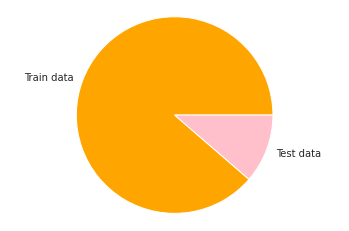

time: 46.9 ms


In [44]:
label_s = ['Train data', 'Test data']
values = [len(train), len(test)]
colors = ['orange','pink']
plt.pie(values, labels=label_s, colors=colors)
plt.axis('equal')
plt.show()

## Statistics of labels or classes in training and testing sets

Text(0.5, 1.0, 'Statistic of train set')

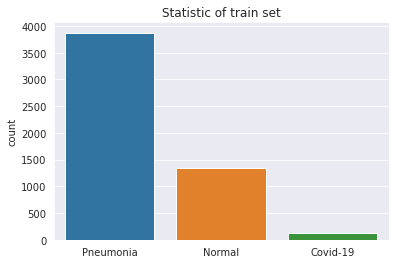

time: 224 ms


In [15]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("Pneumonia")
    elif(i[1]==1):
        l.append("Normal")
    else:
        l.append("Covid-19")
sns.set_style('darkgrid')
sns.countplot(l)
plt.title('Statistic of train set')

In [17]:
pneu_dir = os.path.join('/home/kibinda/DONNEES/Téléchargements/AIMS_Stage/Recherches_propres/chest_xray/train/PNEUMONIA')
norm_dir = os.path.join('/home/kibinda/DONNEES/Téléchargements/AIMS_Stage/Recherches_propres/chest_xray/train/NORMAL')
covid_dir = os.path.join('/home/kibinda/DONNEES/Téléchargements/AIMS_Stage/Recherches_propres/chest_xray/train/Covid-19')

print('Total training PNEUMONIA images:', len(os.listdir(pneu_dir)))
print('Total training NORMAL images:', len(os.listdir(norm_dir)))
print('Total training Covid-19 images:', len(os.listdir(covid_dir)))

pneu_files = os.listdir(pneu_dir)
#print(pneu_files[:10])

norm_files = os.listdir(norm_dir)
#print(norm_files[:10])

covid_files = os.listdir(covid_dir)
#print(covid_files[:10])

Total training PNEUMONIA images: 3876
Total training NORMAL images: 1342
Total training Covid-19 images: 135
time: 10.8 ms


Text(0.5, 1.0, 'Statistic of test set')

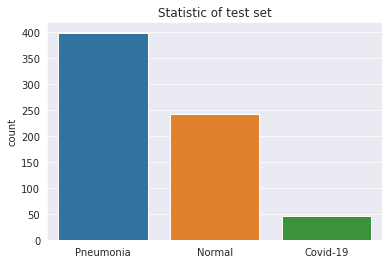

time: 149 ms


In [16]:
l = []
for i in test:
    if(i[1] == 0):
        l.append("Pneumonia")
    elif(i[1]==1):
        l.append("Normal")
    else:
        l.append("Covid-19")
sns.set_style('darkgrid')
sns.countplot(l)
plt.title('Statistic of test set')

In [18]:
pneu_dir = os.path.join('/home/kibinda/DONNEES/Téléchargements/AIMS_Stage/Recherches_propres/chest_xray/test/PNEUMONIA')
norm_dir = os.path.join('/home/kibinda/DONNEES/Téléchargements/AIMS_Stage/Recherches_propres/chest_xray/test/NORMAL')
covid_dir = os.path.join('/home/kibinda/DONNEES/Téléchargements/AIMS_Stage/Recherches_propres/chest_xray/test/Covid-19')

print('Total testing PNEUMONIA images:', len(os.listdir(pneu_dir)))
print('Total testing NORMAL images:', len(os.listdir(norm_dir)))
print('Total testing Covid-19 images:', len(os.listdir(covid_dir)))

pneu_files = os.listdir(pneu_dir)
#print(pneu_files[:10])

norm_files = os.listdir(norm_dir)
#print(norm_files[:10])

covid_files = os.listdir(covid_dir)
#print(covid_files[:10])

Total testing PNEUMONIA images: 398
Total testing NORMAL images: 242
Total testing Covid-19 images: 45
time: 16.2 ms


## Data visualization & Preprocessing

In [39]:
labels

['PNEUMONIA', 'NORMAL', 'Covid-19']

time: 2.18 ms


In [20]:
pic_index = 2

next_pneu = [os.path.join(pneu_dir, fname) 
                for fname in pneu_files[pic_index-2:pic_index]]
next_norm = [os.path.join(norm_dir, fname) 
                for fname in norm_files[pic_index-2:pic_index]]
next_covid = [os.path.join(covid_dir, fname) 
                for fname in covid_files[pic_index-2:pic_index]]

time: 37.2 ms


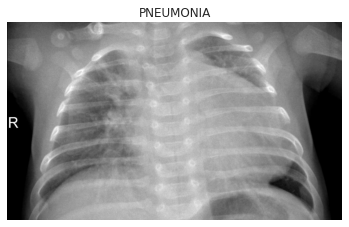

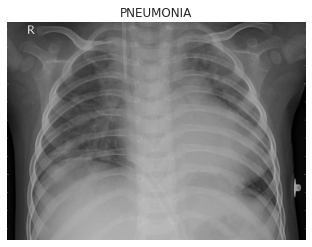

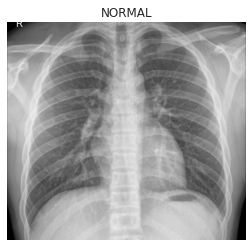

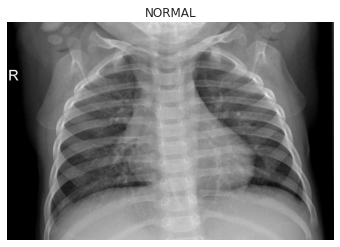

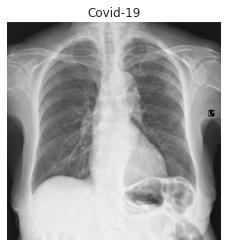

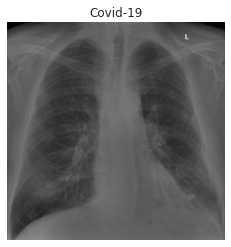

time: 2.45 s


In [21]:
for i, img_path in enumerate(next_pneu):
    img = mpimg.imread(img_path)
    plt.imshow(img, cmap='gray')
    plt.axis('Off')
    plt.title(labels[0])
    plt.show()
    
for i, img_path in enumerate(next_norm):
    img = mpimg.imread(img_path)
    plt.imshow(img, cmap='gray')
    plt.axis('Off')
    plt.title(labels[1])
    plt.show()
    
for i, img_path in enumerate(next_covid):
    img = mpimg.imread(img_path)
    plt.imshow(img, cmap='gray')
    plt.axis('Off')
    plt.title(labels[-1])
    plt.show()

### Split the data

In [22]:
x_train = []
y_train = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)

time: 16 ms


### Normalization

In [23]:
x_train = np.array(x_train) / 255
x_test = np.array(x_test) / 255

time: 368 ms


### Reshape data

In [24]:
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

time: 2.13 ms


## Data augmentation

In [25]:
# With data augmentation to prevent overfitting and handling the imbalance in dataset

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.4, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

time: 719 ms


## Building Model

In [26]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

time: 132 ms


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [28]:
EPOCHS = 25
BS = 32

time: 968 µs


In [29]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy']) #rmsprop

time: 98.6 ms


In [30]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = BS) ,epochs = EPOCHS , validation_data = datagen.flow(x_test, y_test) ,verbose = 1)

#model.save("rps.h5")

Epoch 1/25
168/168 [==============================] - ETA: 0s - batch: 83.5000 - size: 31.8512 - loss: 0.6883 - acc: 0.7101WARNING:tensorflow:From /home/kibinda/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training_v1.py:2048: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
168/168 [==============================] - 245s 1s/step - batch: 83.5000 - size: 31.8512 - loss: 0.6883 - acc: 0.7101 - val_loss: 0.8873 - val_acc: 0.5927
Epoch 2/25
168/168 [==============================] - 240s 1s/step - batch: 83.5000 - size: 31.8512 - loss: 0.5679 - acc: 0.7645 - val_loss: 0.7813 - val_acc: 0.6891
Epoch 3/25
168/168 [==============================] - 233s 1s/step - batch: 83.5000 - size: 31.8512 - loss: 0.4145 - acc: 0.8298 - val_loss: 0.9270 - val_acc: 0.6321
Epoch 4/25
168/168 [===

In [31]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

Loss of the model is -  0.27877103953901
Accuracy of the model is -  91.53284430503845 %
time: 7.2 s


## Analysis after training the model

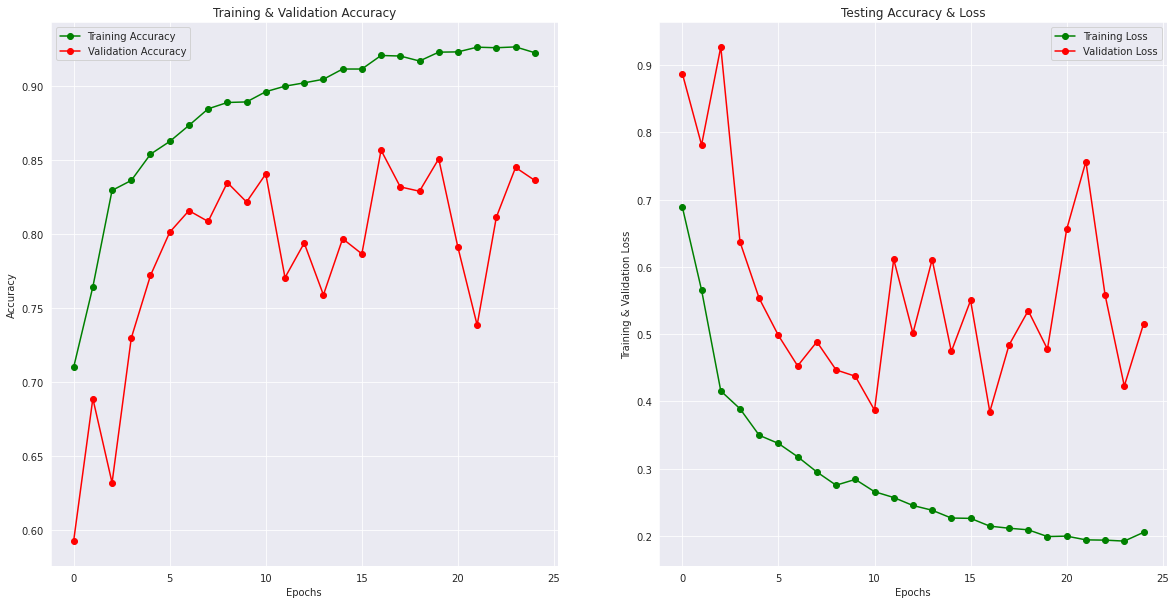

time: 840 ms


In [32]:
epochs = [i for i in range(EPOCHS)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['acc']
train_loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [33]:
predictions = model.predict_classes(x_test)
#predictions = predictions.reshape(1,-1)[0]
#predictions[:15]

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
time: 5.63 s


In [34]:
print(classification_report(y_test, predictions, target_names = ['Pneumonia','Normal','Covid-19']))

              precision    recall  f1-score   support

   Pneumonia       0.89      0.98      0.94       398
      Normal       0.96      0.81      0.88       242
    Covid-19       0.91      0.91      0.91        45

    accuracy                           0.92       685
   macro avg       0.92      0.90      0.91       685
weighted avg       0.92      0.92      0.91       685

time: 10.7 ms


In [35]:
cm = confusion_matrix(y_test,predictions)
cm

array([[390,   7,   1],
       [ 43, 196,   3],
       [  3,   1,  41]])

time: 113 ms


In [36]:
cm = pd.DataFrame(cm , index = ['0','1','2'] , columns = ['0','1','2'])

time: 53.6 ms


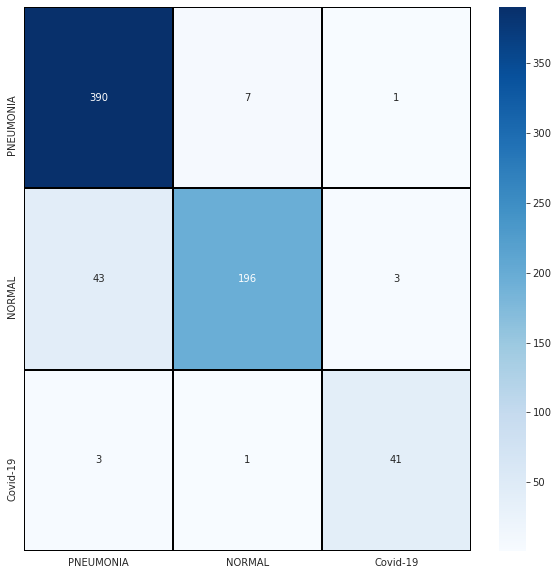

time: 1.58 s


In [37]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)

In [38]:
cm = confusion_matrix(y_test,predictions)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1] + cm[2,2]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1] + cm[0,2])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1] + cm[2,2])
# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[390   7   1]
 [ 43 196   3]
 [  3   1  41]]
acc: 0.9153
sensitivity: 0.9799
specificity: 0.7000
time: 4.91 ms


In [47]:
recall_score( y_test, predictions,average='weighted')

0.9153284671532846

time: 3.87 ms


In [49]:
precision_score( y_test, predictions,average='weighted') 

0.919005807640139

time: 3.68 ms


In [50]:
accuracy_score(y_test, predictions)

0.9153284671532846

time: 2.68 ms
